In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import os

In [59]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Univariant Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


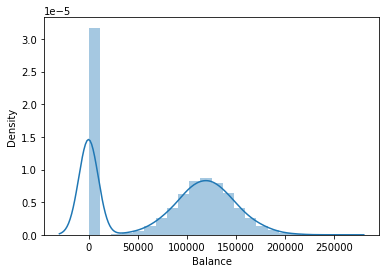

In [61]:
sns.distplot(churn['Balance'], kde=True)

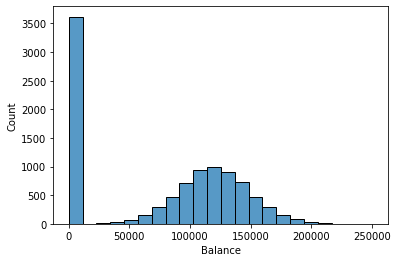

In [62]:
sns.histplot(churn['Balance'])

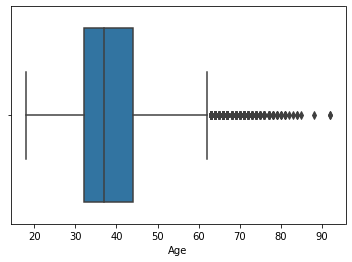

In [63]:
sns.boxplot(x=churn['Age'])

## Bivariate Analysis

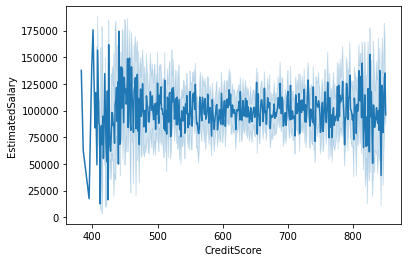

In [64]:
sns.lineplot(data = churn , x='CreditScore', y='EstimatedSalary')

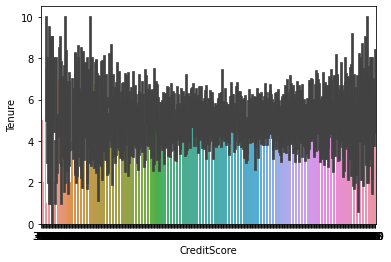

In [65]:
sns.barplot(data=churn, x="CreditScore", y="Tenure")

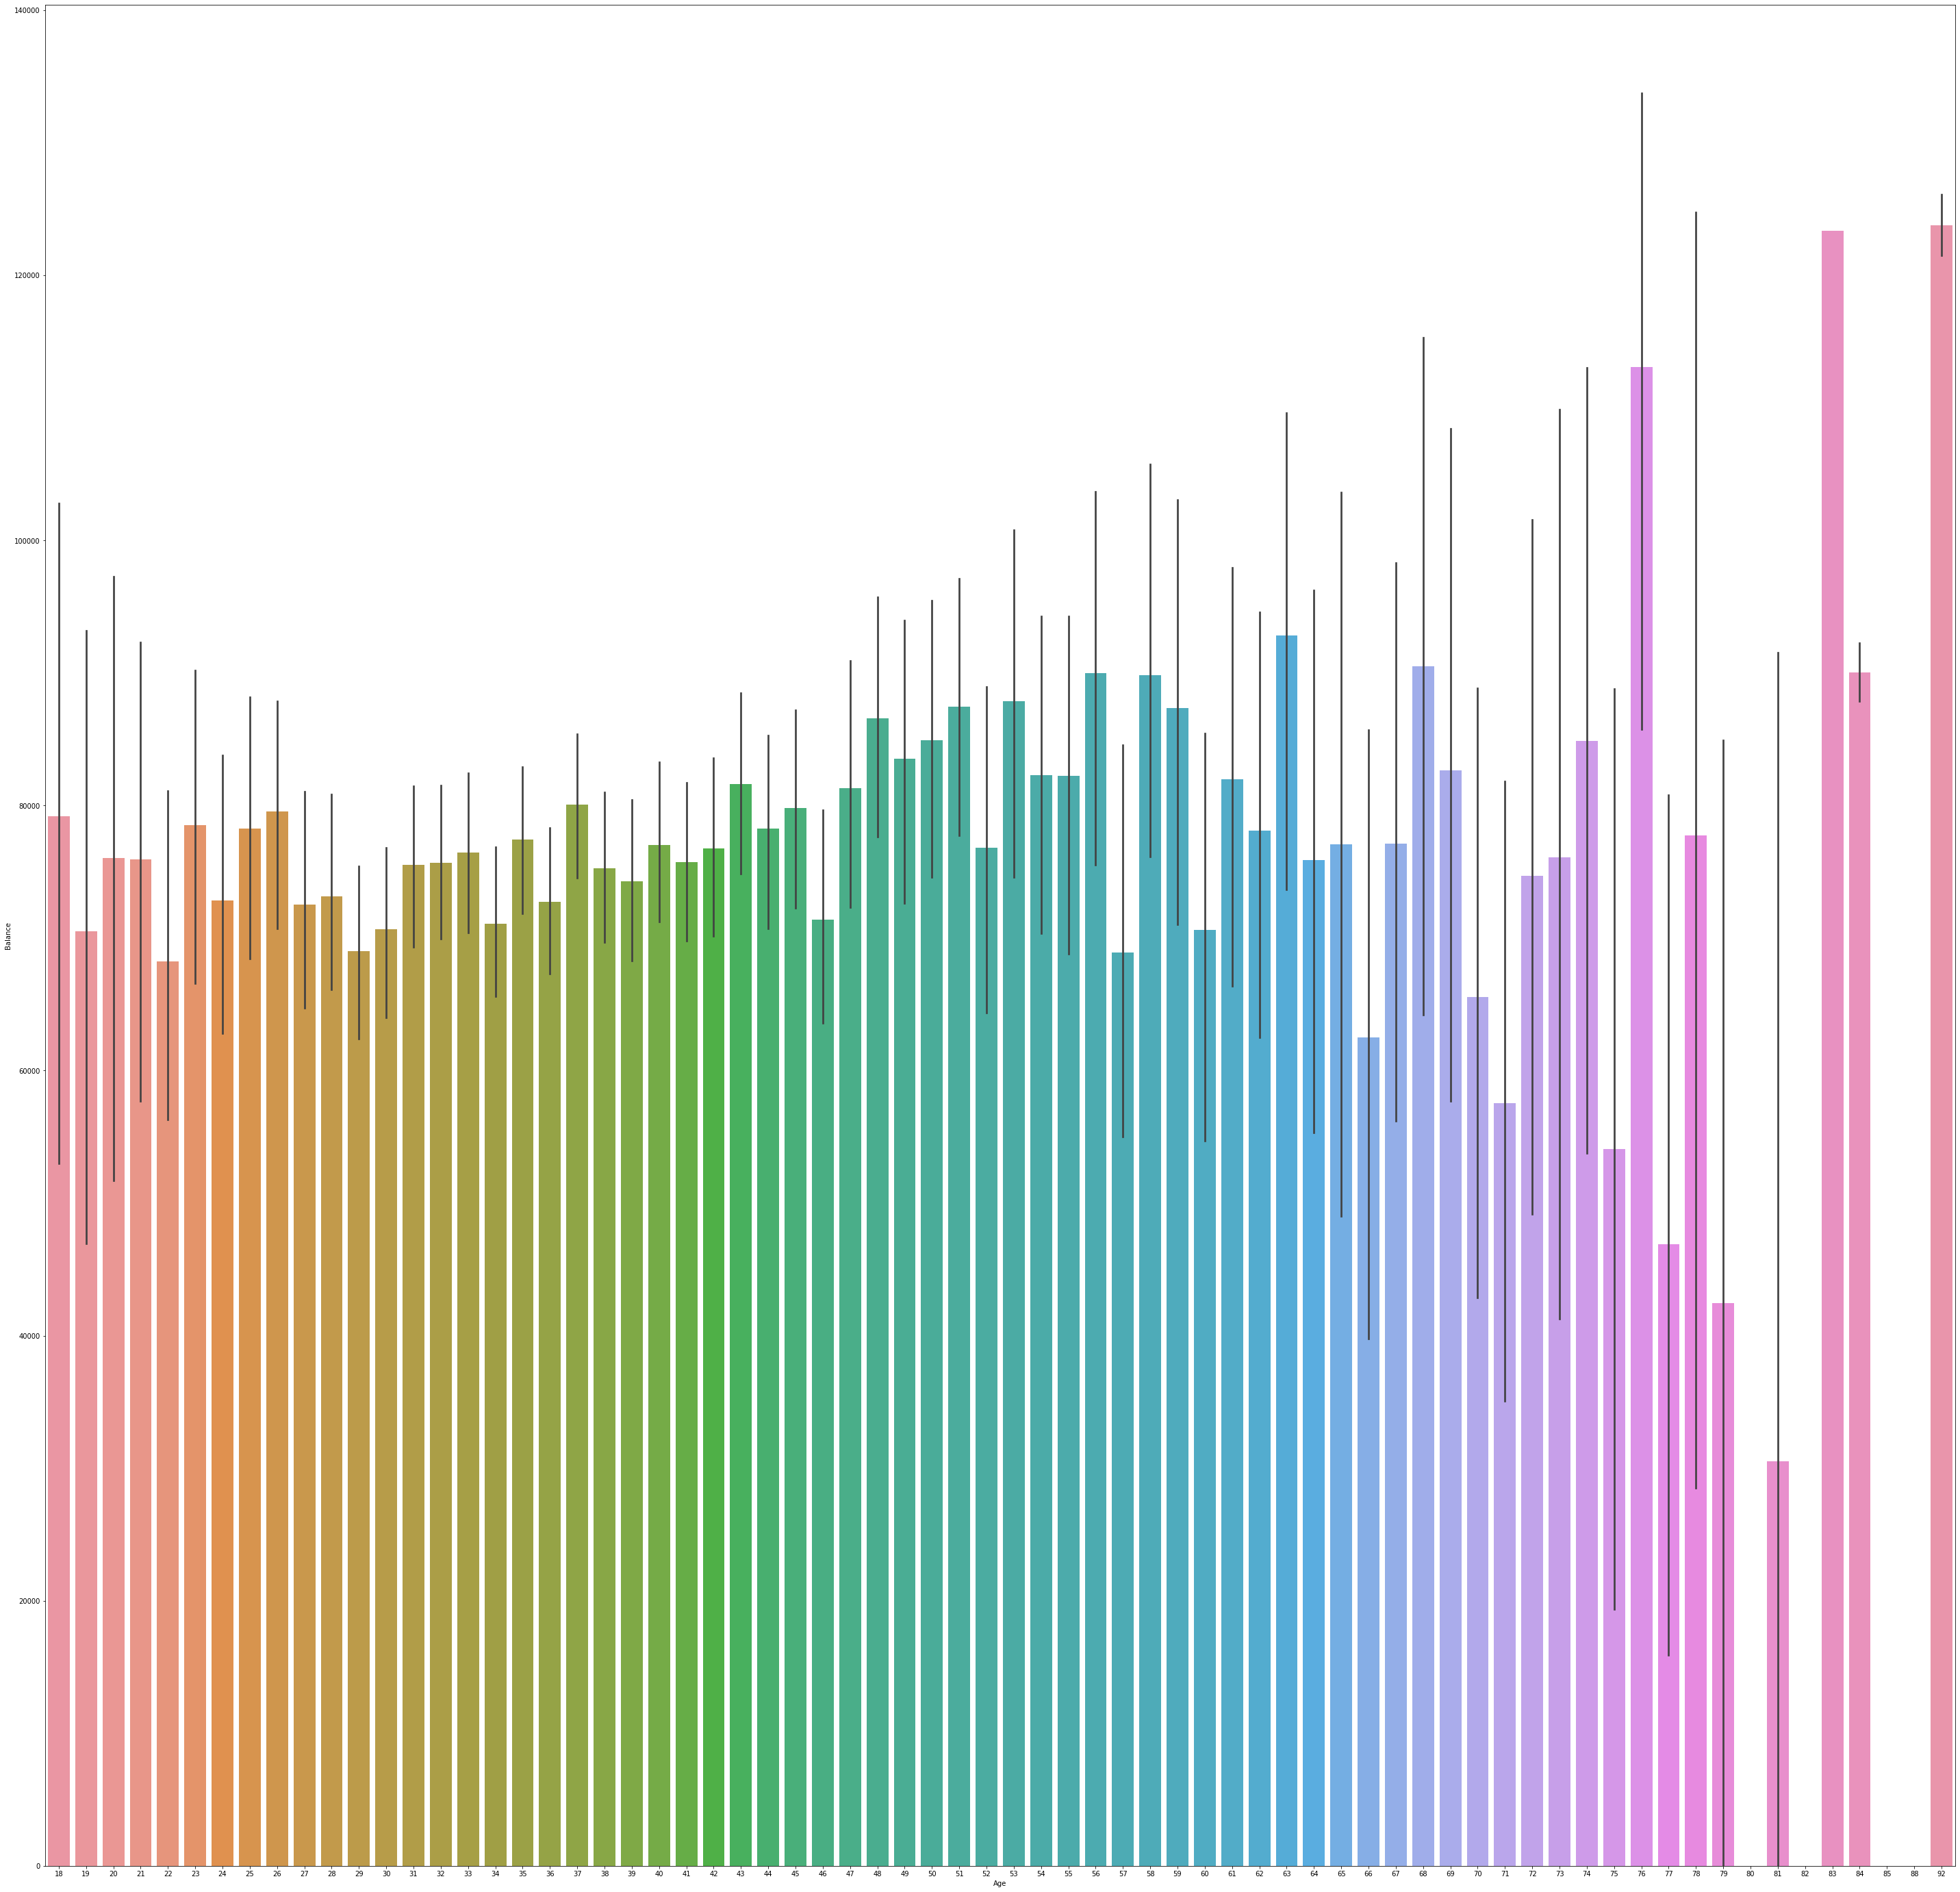

In [66]:
plt.figure(figsize=(50,50))
sns.barplot(data = churn, x= 'Age', y='Balance')

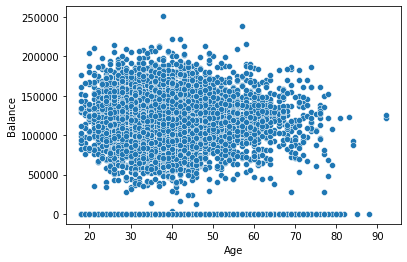

In [67]:
sns.scatterplot(data = churn, x = 'Age', y = 'Balance')

# Multi variate analysis

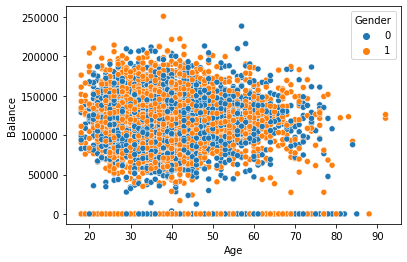

In [68]:
sns.scatterplot(data = churn, x = 'Age', y = 'Balance', hue = "Gender")

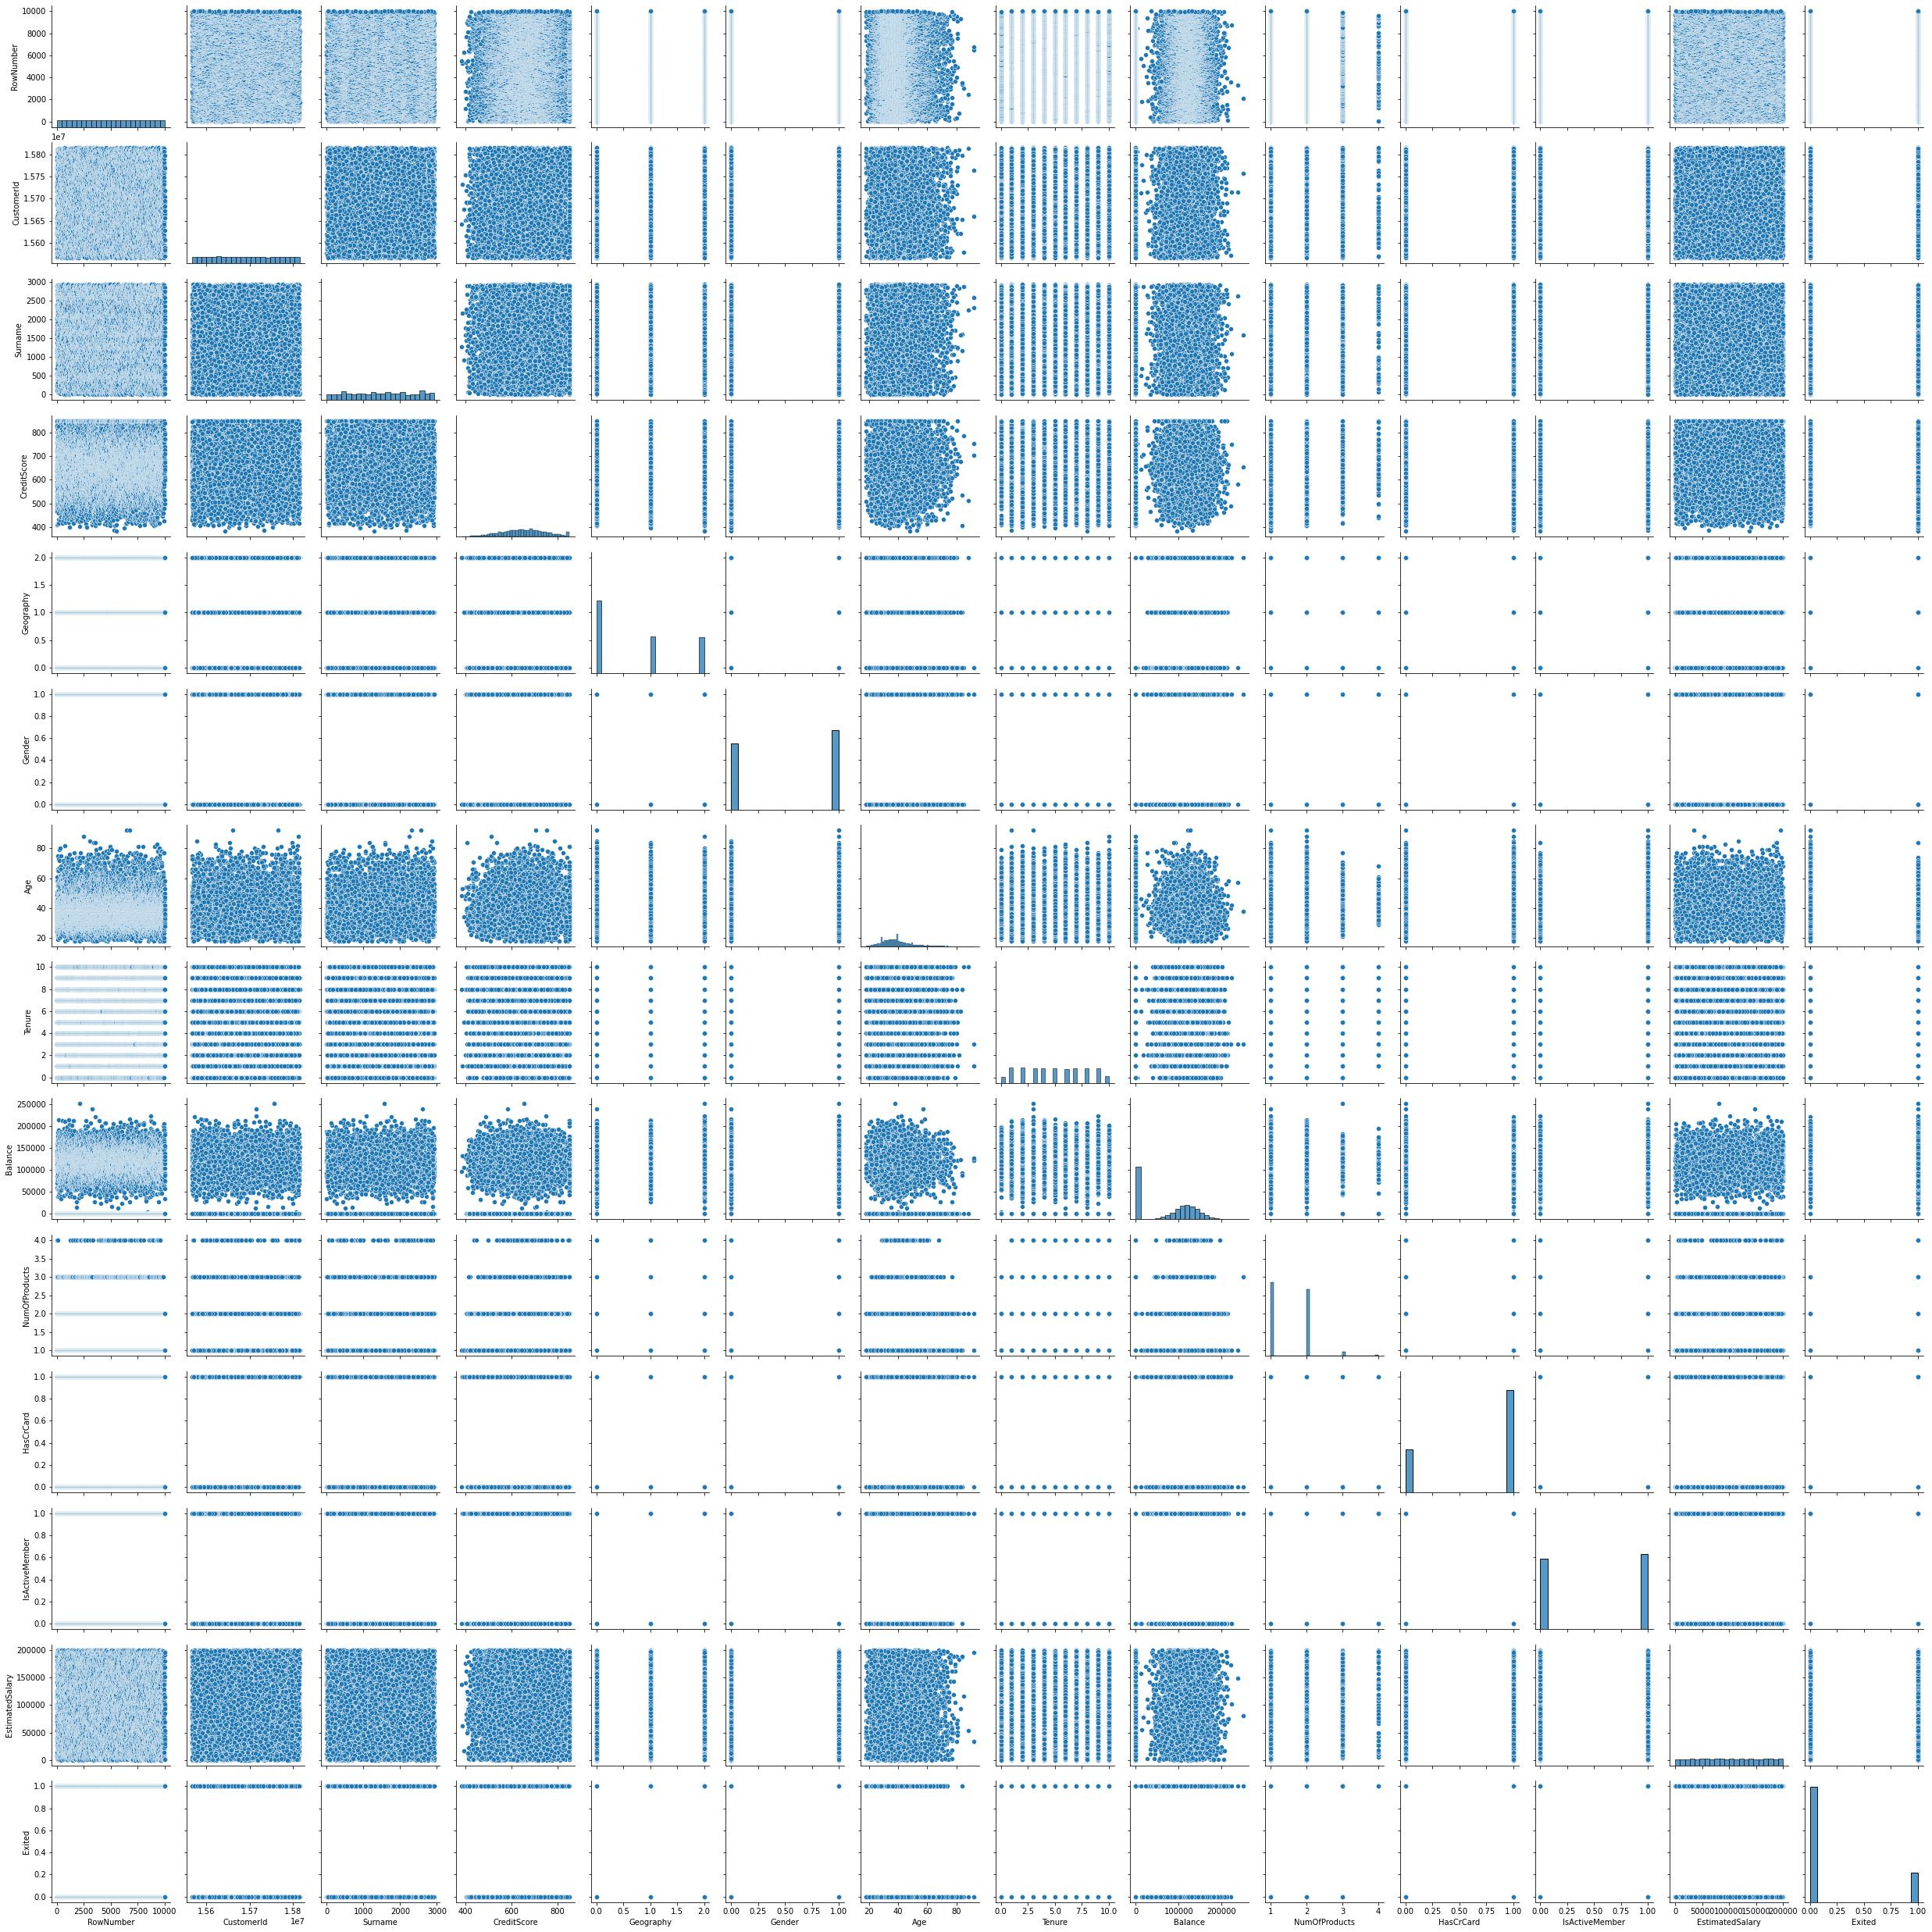

In [69]:
sns.pairplot(data = churn)

## Descriptive Statistics

In [70]:
churn.mean(numeric_only = True)

RowNumber          5.000500e+03
CustomerId         1.569094e+07
Surname            1.507774e+03
CreditScore        6.509648e+02
Geography          7.463000e-01
Gender             5.457000e-01
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [71]:
churn.median(numeric_only = True)

RowNumber          5.000500e+03
CustomerId         1.569074e+07
Surname            1.542000e+03
CreditScore        6.520000e+02
Geography          0.000000e+00
Gender             1.000000e+00
Age                3.700000e+01
Tenure             5.000000e+00
Balance            9.719854e+04
NumOfProducts      1.000000e+00
HasCrCard          1.000000e+00
IsActiveMember     1.000000e+00
EstimatedSalary    1.001939e+05
Exited             0.000000e+00
dtype: float64

In [72]:
churn['Age'].mode()

0    37
dtype: int64

In [73]:
churn.var(numeric_only = True)

RowNumber          8.334167e+06
CustomerId         5.174815e+09
Surname            7.160617e+05
CreditScore        9.216029e+03
Geography          6.848048e-01
Gender             2.479363e-01
Age                1.099941e+02
Tenure             8.364673e+00
Balance            3.893436e+09
NumOfProducts      3.383218e-01
HasCrCard          2.077905e-01
IsActiveMember     2.497970e-01
EstimatedSalary    3.307457e+09
Exited             1.622225e-01
dtype: float64

In [74]:
churn.std(numeric_only = True)

RowNumber           2886.895680
CustomerId         71936.186123
Surname              846.204311
CreditScore           96.000151
Geography              0.827529
Gender                 0.497932
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [75]:
churn.describe()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,1507.774200,650.964800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,846.204311,96.000151,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,0.000000,383.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,773.750000,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,1542.000000,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,2238.250000,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,2931.000000,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [76]:
churn['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [77]:
churn['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

## Handling Empty Values

In [78]:
churn.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [79]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Outliers

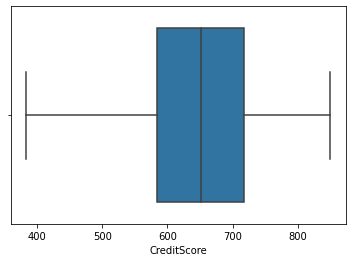

In [80]:
sns.boxplot(x=churn['CreditScore'])

In [81]:
q  = churn.quantile([0.75,0.25], numeric_only = True)
q

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0.75,7500.25,15753233.75,2238.25,718.0,1.0,1.0,44.0,7.0,127644.24,2.0,1.0,1.0,149388.2475,0.0
0.25,2500.75,15628528.25,773.75,584.0,0.0,0.0,32.0,3.0,0.00,1.0,0.0,0.0,51002.1100,0.0


In [82]:
iqr =  q.iloc[0] - q.iloc[1]
iqr

RowNumber            4999.5000
CustomerId         124705.5000
Surname              1464.5000
CreditScore           134.0000
Geography               1.0000
Gender                  1.0000
Age                    12.0000
Tenure                  4.0000
Balance            127644.2400
NumOfProducts           1.0000
HasCrCard               1.0000
IsActiveMember          1.0000
EstimatedSalary     98386.1375
Exited                  0.0000
dtype: float64

In [83]:
u = q.iloc[0] + (1.5*iqr)
u

RowNumber          1.499950e+04
CustomerId         1.594029e+07
Surname            4.435000e+03
CreditScore        9.190000e+02
Geography          2.500000e+00
Gender             2.500000e+00
Age                6.200000e+01
Tenure             1.300000e+01
Balance            3.191106e+05
NumOfProducts      3.500000e+00
HasCrCard          2.500000e+00
IsActiveMember     2.500000e+00
EstimatedSalary    2.969675e+05
Exited             0.000000e+00
dtype: float64

In [84]:
l = q.iloc[1] - (1.5*iqr)
l

RowNumber         -4.998500e+03
CustomerId         1.544147e+07
Surname           -1.423000e+03
CreditScore        3.830000e+02
Geography         -1.500000e+00
Gender            -1.500000e+00
Age                1.400000e+01
Tenure            -3.000000e+00
Balance           -1.914664e+05
NumOfProducts     -5.000000e-01
HasCrCard         -1.500000e+00
IsActiveMember    -1.500000e+00
EstimatedSalary   -9.657710e+04
Exited             0.000000e+00
dtype: float64

In [85]:
churn['CreditScore'] = np.where(np.logical_or(churn['CreditScore'] > 900, churn['CreditScore'] < 383), 652, churn['CreditScore'])

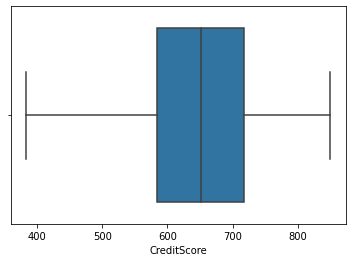

In [86]:
sns.boxplot(x=churn['CreditScore'])

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
oneh = OneHotEncoder()

In [ ]:
churn['Gender'] = le.fit_transform(churn['Gender'])
churn['Surname'] = le.fit_transform(churn['Surname'])
churn['Geography'] = le.fit_transform(churn['Geography'])
churn

# Split into x and y

In [ ]:
x = churn.iloc[:, 3:13]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [ ]:
y = churn['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-0.33298279, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44757168,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.55179182, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60456261, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.2608444 ,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46918782, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

# Train Test

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)


x_train

array([[-0.10380503, -0.90188624,  0.91241915, ...,  0.64609167,
         0.97024255, -0.77021814],
       [-1.14552214, -0.90188624,  0.91241915, ...,  0.64609167,
        -1.03067011, -1.39576675],
       [-0.63508076, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.49965629],
       ...,
       [ 0.90666058, -0.90188624,  0.91241915, ...,  0.64609167,
        -1.03067011,  1.41441489],
       [-0.63508076,  1.51506738, -1.09598752, ...,  0.64609167,
         0.97024255,  0.84614739],
       [-0.29131411,  0.30659057, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.32630495]])

In [ ]:
x_train.shape

(7000, 10)

In [ ]:
x_test

array([[-0.56216056,  0.30659057, -1.09598752, ...,  0.64609167,
         0.97024255,  1.61304597],
       [-1.33303123, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.49753166],
       [ 0.5733111 ,  1.51506738, -1.09598752, ...,  0.64609167,
         0.97024255, -0.4235611 ],
       ...,
       [ 0.3545505 , -0.90188624,  0.91241915, ...,  0.64609167,
         0.97024255,  1.17045451],
       [ 0.4274707 , -0.90188624,  0.91241915, ...,  0.64609167,
         0.97024255, -0.50846777],
       [ 0.83374038,  0.30659057, -1.09598752, ...,  0.64609167,
         0.97024255, -1.15342685]])

In [ ]:
y_train

7681    1
9031    0
3691    0
202     1
5625    0
       ..
9225    0
4859    0
3264    0
9845    0
2732    1
Name: Exited, Length: 7000, dtype: int64

In [ ]:
y_test

9394    0
898     1
2398    0
5906    0
2343    0
       ..
4004    0
7375    0
9307    0
8394    0
5233    1
Name: Exited, Length: 3000, dtype: int64